# [[T-Academy X KaKr] 성인 인구조사 소득 예측 대회](https://www.kaggle.com/c/kakr-4th-competition)


## 라이브러리

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score ,f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

import time
import os

import sys, gc, warnings, random, datetime

In [2]:
# !kaggle competitions download -c kakr-4th-competition

In [3]:
pd.options.display.float_format = '{:.3f}'.format

In [4]:
train_origin = pd.read_csv('train.csv')
test_origin = pd.read_csv('test.csv')
submission_origin = pd.read_csv('sample_submission.csv')

In [5]:
train = train_origin.copy()
test = test_origin.copy()
submission = submission_origin.copy()

## 기본 정보

In [6]:
print(train.shape)
print(test.shape)

(26049, 16)
(6512, 15)


In [7]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K


In [8]:
test

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
6508,6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
6509,6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico
6510,6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [10]:
train.describe(include = 'all')

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,26049.000,26049.000,26049,26049.000,26049,26049.000,26049,26049,26049,26049,26049,26049.000,26049.000,26049.000,26049,26049
unique,nan,nan,9,nan,16,nan,7,15,6,5,2,nan,nan,nan,41,2
top,nan,nan,Private,nan,HS-grad,nan,Married-civ-spouse,Prof-specialty,Husband,White,Male,nan,nan,nan,United-States,<=50K
freq,nan,nan,18123,nan,8433,nan,11970,3304,10541,22315,17482,nan,nan,nan,23371,19744
mean,13024.000,38.569,NaN,190304.482,NaN,10.088,NaN,NaN,NaN,NaN,NaN,1087.690,87.733,40.443,NaN,NaN
std,7519.843,13.671,NaN,105966.299,NaN,2.568,NaN,NaN,NaN,NaN,NaN,7388.855,403.230,12.362,NaN,NaN
min,0.000,17.000,NaN,13769.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,1.000,NaN,NaN
25%,6512.000,28.000,NaN,118108.000,NaN,9.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,40.000,NaN,NaN
50%,13024.000,37.000,NaN,178866.000,NaN,10.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,40.000,NaN,NaN
75%,19536.000,48.000,NaN,237735.000,NaN,12.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,45.000,NaN,NaN


In [11]:
# import qgrid
# qgrid_widget = qgrid.show_grid(train,show_toolbar=True)
# qgrid_widget

## Feature 설명

- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over "$50K" a year.
    
    - age : 나이
    - workclass : 고용 형태
    - fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
            - A single cell estimate of the population 16+ for each state.
            - Controls for Hispanic Origin by age and sex.
            - Controls by Race, age and sex.
            -CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.
    - education : 교육 수준
    - education_num : 교육 수준 수치
    - marital_status: 결혼 상태
    - occupation : 업종
    - relationship : 가족 관계
    - race : 인종
    - sex : 성별
    - capital_gain : 양도 소득
    - capital_loss : 양도 손실
    - hours_per_week : 주당 근무 시간
    - native_country : 국적
    - income : 수익 (예측해야 하는 값)
             >50K : 1
             <=50K : 0

In [12]:
train.query('capital_gain > 9000').shape
train.query('capital_gain > 9000 & income == ">50K"').shape

(633, 16)

In [13]:
for col in train.columns:
    if train[col].dtype == 'object':
        print(train[col].dtype)
        categories = train[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

object
[workclass] (9)
Private
State-gov
?
Self-emp-not-inc
Local-gov
Federal-gov
Self-emp-inc
Without-pay
Never-worked

object
[education] (16)
HS-grad
9th
Some-college
Bachelors
11th
1st-4th
5th-6th
Assoc-acdm
10th
Prof-school
7th-8th
Masters
Assoc-voc
Doctorate
12th
Preschool

object
[marital_status] (7)
Married-civ-spouse
Never-married
Separated
Married-spouse-absent
Divorced
Widowed
Married-AF-spouse

object
[occupation] (15)
Sales
Machine-op-inspct
Other-service
Prof-specialty
Adm-clerical
Craft-repair
?
Handlers-cleaners
Farming-fishing
Exec-managerial
Transport-moving
Protective-serv
Tech-support
Priv-house-serv
Armed-Forces

object
[relationship] (6)
Husband
Own-child
Not-in-family
Unmarried
Wife
Other-relative

object
[race] (5)
White
Black
Asian-Pac-Islander
Other
Amer-Indian-Eskimo

object
[sex] (2)
Male
Female

object
[native_country] (41)
United-States
?
Mexico
Poland
Philippines
Puerto-Rico
Vietnam
Germany
Cuba
France
Ireland
El-Salvador
Guatemala
Haiti
Trinadad&Tobago
J

### 범주형과 숫자형 나누기

In [14]:
def object_col(df):
    object_columns = []
    numerical_columns = []
    for col in df.columns:
        if df[col].dtype == 'object':
#             print(f'column [{col}] is categorical.')
            object_columns.append(col)
        else: 
#             print(f'column [{col}] is numerical.')
            numerical_columns.append(col)
        
    print(f'object_columns: {object_columns}')
    print(f'numerical_columns: {numerical_columns}')
#     return object_columns, numerical_columns            

In [15]:
object_col(train)

object_columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
numerical_columns: ['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


### income 숫자 변경

In [16]:
train['income'] = train['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [17]:
train.groupby(by = ['race', 'sex'])[['capital_gain','income']].agg(['count','mean']).style.background_gradient(cmap = 'Purples')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.2+ MB


In [19]:
# train['income'] = (train['income'] == '>50k').astype(int)

### 추가 변수 만들 것:
 1. hours_per_week 범주화 (bin: 5)
 2. native_country 범주화
     US를 제외하고, income 이 1인 비율이 0 / 30 / 40 / 인 국가들
     bin1 = ['US', 'Canada']
     bin2 = ['Mexico']
     bin3 = ['?']
     bin4 = ['Germany', 'Poland', 'England', 'France', 'Ireland',  ]
     bin5 = ['Philippines']
    
 3. 가정: 같은 주인가? 서로 다른 주인가?
 
 4. capital gain 이 중요할 수 있따.
 

### finding
never workd & non pay 는 0으로 고정해도 됨

married spouse absent: 300:27 = 1:0 결혼했는데 배우자 확인 안되는 사람

armed force; all 0?

백인이 아닌 사람 끼리 보면 1이 더 많다.

직업이나 교육을 0/1로 나눠도 , 인종으로 나눠도, 비슷하다. 결론은 변수를 섞어야한다.

occu num 이 있기 때문에 c=occu는 빼도된다. 실제로 점수 변화 업슴

lda, pca, lasso, 쓸 수 있는거 다 , 

전처리는 논문 레퍼런스하면 방어 가능
뭐의 특징, 장점, 알고리즘, 이점, 기법, 깊은 원리, 변수 선택 전략 : 회귀는 라쏘 피처임포턴스 , 분류도 어떻게 변수를 정하는지.
알고리즘/이론을 알고 쓰냐 안쓰냐 차이. 코드 자체는 안봄. 알고 갖다썻냐 아니냐.

## 시각화
 - 범주형 : bar
 - 수치형
    - 이산형 : bar
    - 연속형 : kdeplot, histogram
 - 범주형 + 수치형 : boxplot, violinplot, etc
 - 수치형 + 수치형 : scatter

### Husband나 Wife가 아닌경우엔 대다수가 0이다.

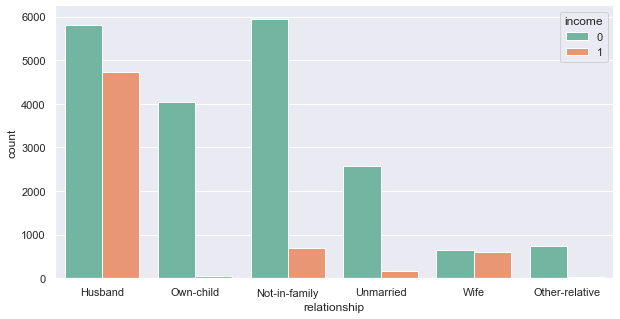

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
# sns.set_style("white")
sns.countplot(x="relationship",hue="income", data=train, palette="Set2")
sns.despine()
# sns.countplot(x="relationship",hue="income", data=test, palette="Set2")

### Capital Gain이 5000이상은 1 비율이 많다

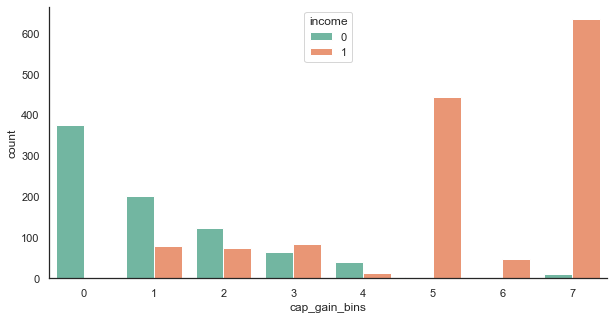

In [21]:
train['cap_gain_bins'] = pd.cut(train['capital_gain'], [0,3000,4000, 5000, 6000, 7000, 8000, 9000, 100000],
                                labels = [0,1,2,3,4,5,6,7]
                               )
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")
sns.countplot(x="cap_gain_bins",hue="income", data=train, palette="Set2")
sns.despine()

In [22]:
train.cap_gain_bins.unique()

[NaN, 5, 1, 0, 2, 7, 3, 4, 6]
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]

In [23]:
train.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cap_gain_bins
10585,10585,33,Private,272411,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0,NaN
13048,13048,28,Private,392487,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,0,NaN
24127,24127,52,Private,259363,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,1,NaN
25884,25884,40,Federal-gov,130749,Some-college,10,Divorced,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,0,NaN
10147,10147,23,Private,204209,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,10,United-States,0,NaN
11521,11521,46,Self-emp-not-inc,168195,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,45,United-States,1,NaN
22682,22682,39,Private,70240,5th-6th,3,Married-spouse-absent,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines,0,NaN
20471,20471,53,Private,193720,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,40,United-States,1,NaN
21742,21742,32,Private,255424,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1,NaN
6950,6950,30,Self-emp-not-inc,281030,HS-grad,9,Never-married,Sales,Unmarried,White,Male,0,0,66,United-States,0,NaN


Text(0.5, 1.0, 'age dist')

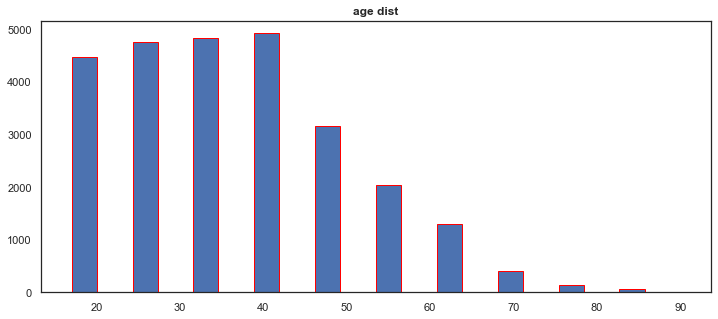

In [24]:
fig, ax = plt.subplots(1,1, figsize = (12,5))
ax.hist(train['age'], width =3, edgecolor = 'red')
ax.set_title('age dist', fontweight = 'bold')

In [25]:
# sns.distplot()

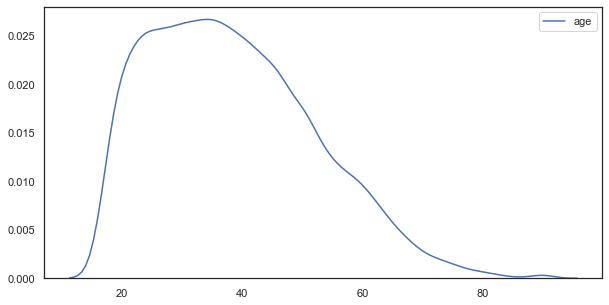

In [26]:
sns.kdeplot(data=train['age'])

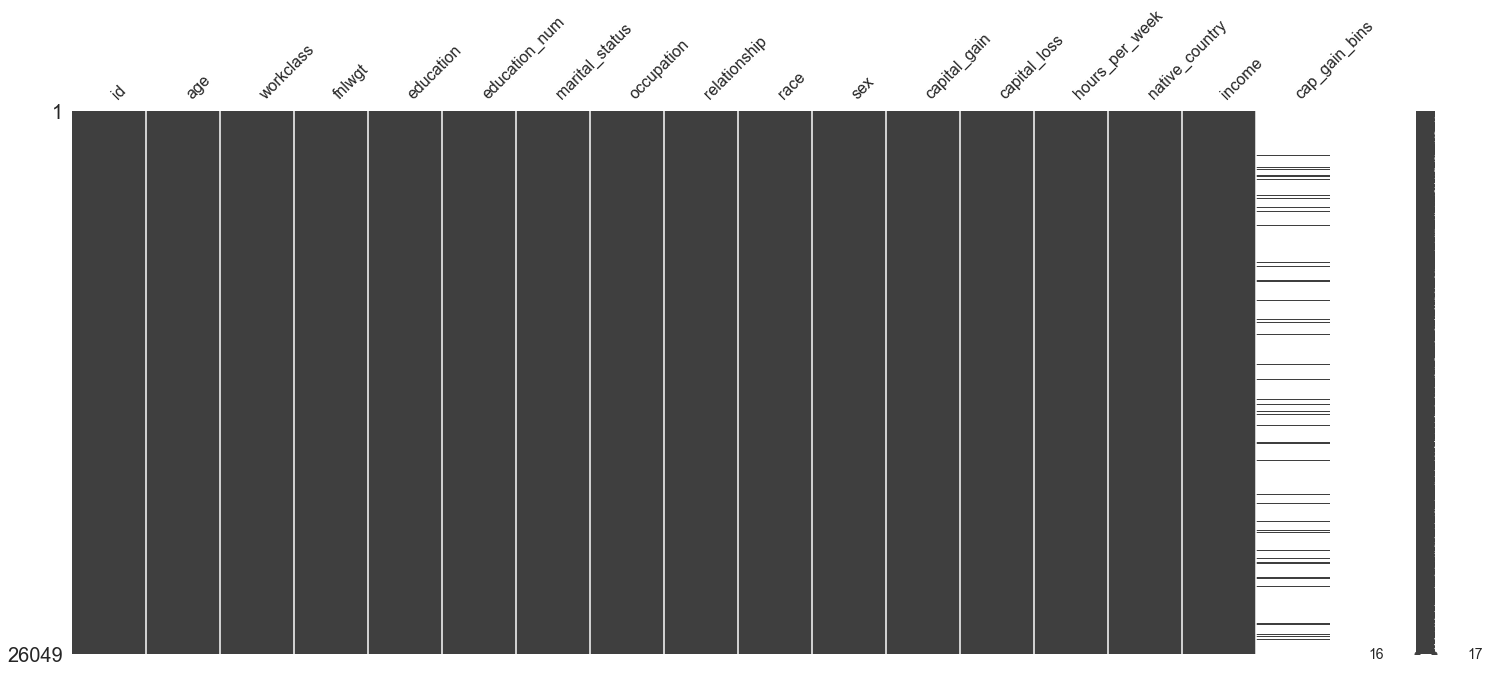

In [27]:
import missingno as msno
msno.matrix(train)

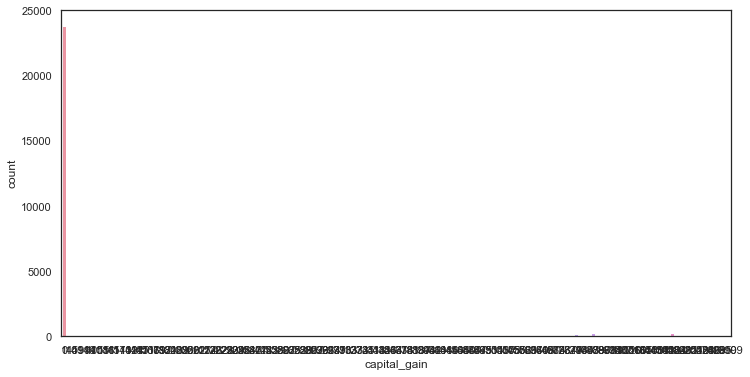

In [28]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x='capital_gain', data = train)
plt.show()

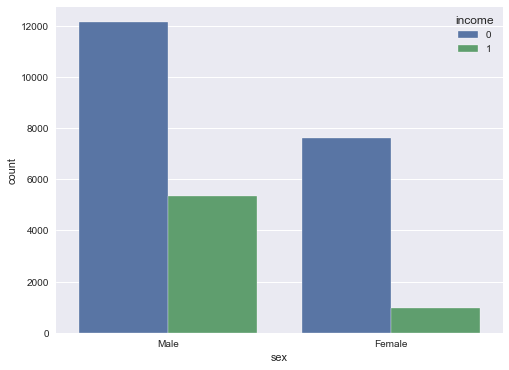

In [29]:
plt.style.use('seaborn')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='sex', data = train, hue = 'income')
plt.show()

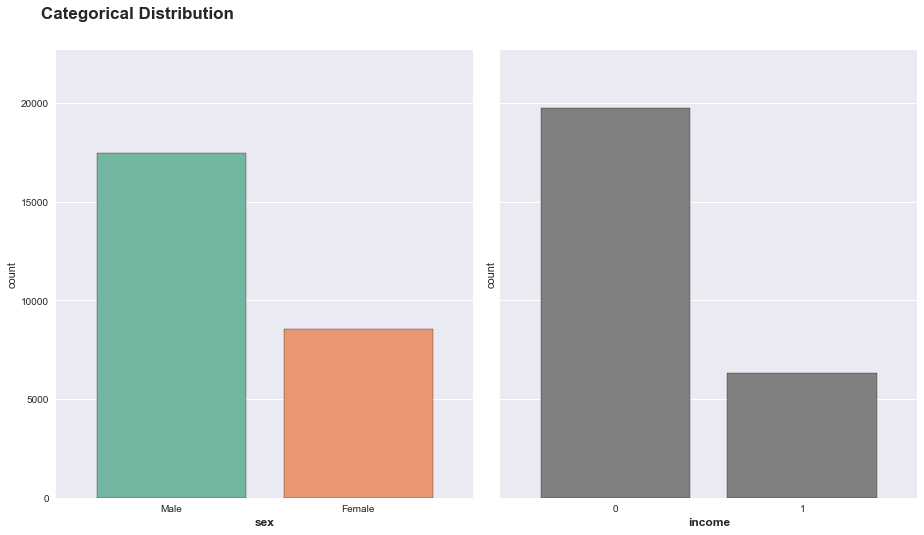

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7), sharey=True)

sns.countplot(x='sex', data= train, ax=axes[0], palette="Set2", edgecolor='black') 
sns.countplot(x='income', data=train, ax=axes[1], color='gray', edgecolor='black') 

# Margin & Label 조정
for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

    
# figure title    
plt.suptitle('Categorical Distribution', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

In [31]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cap_gain_bins
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1,NaN
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0,NaN
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0,NaN
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0,NaN
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,0,NaN
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0,NaN
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0,NaN
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,0,NaN


train.corr().style ~~ 어쩌꼬 써도 됨

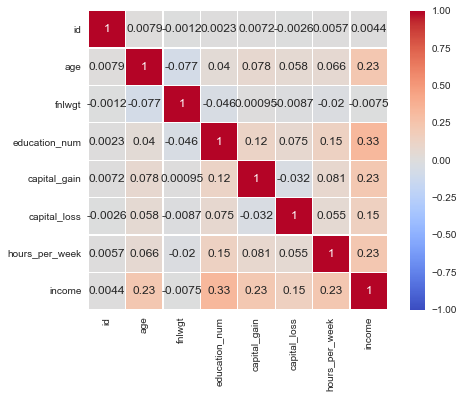

In [32]:
sns.heatmap(train.corr(), annot = True, square = True, linewidth = 0.2, cmap = 'coolwarm', vmax = 1.0, vmin = -1.0)

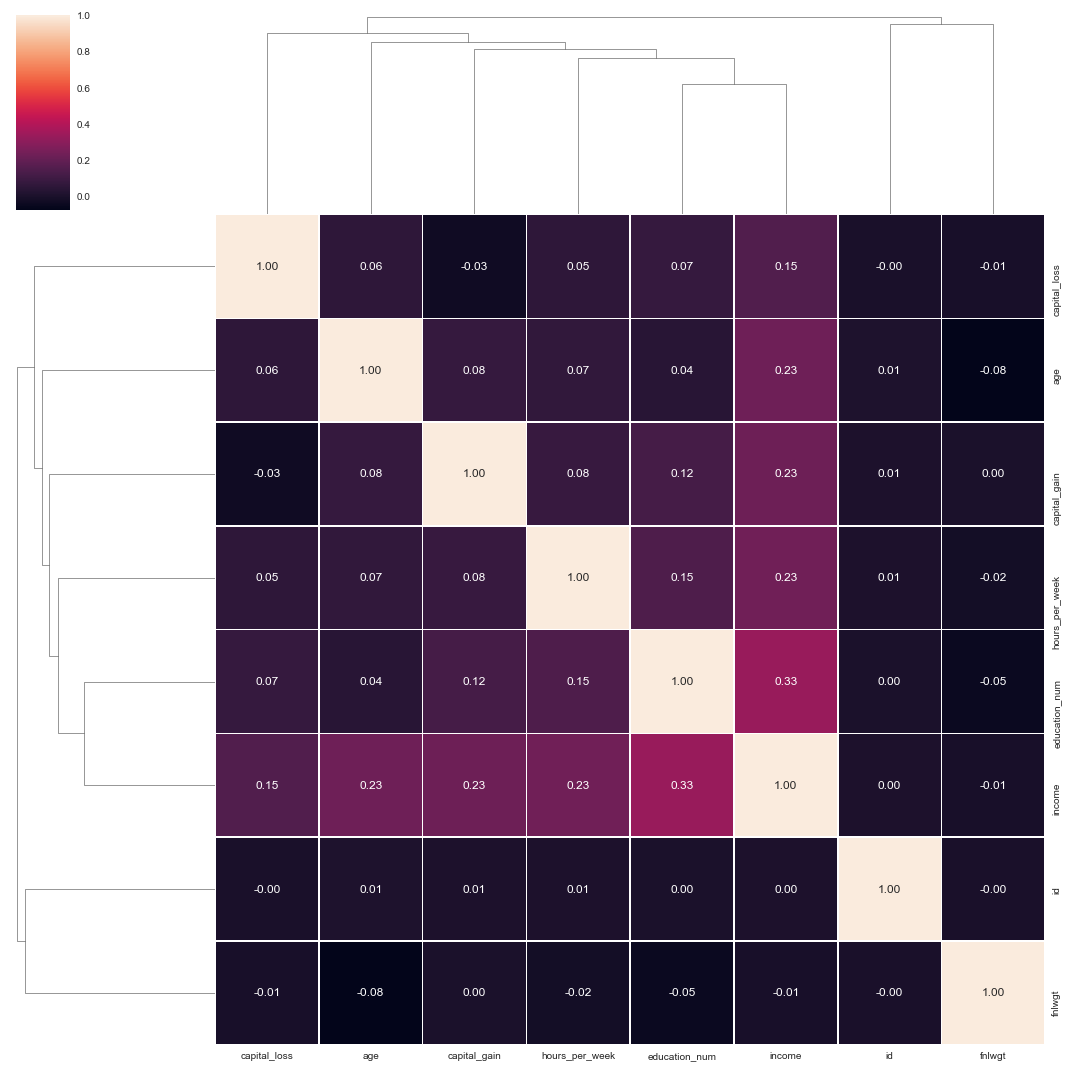

In [33]:
ax = sns.clustermap(train.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(15, 15))
plt.show()

## 전처리

In [34]:
# def get_keys(dd):
#     return list(dd.keys())

def summarizing_dd(dd):
    
    print("\n1. Keys")
    print(dd.columns)
    print("\n2. Shape")
    print(dd.shape)
    print("\n3. Head")
    print(dd.head(5))

def plot_histogram(dd):

    plt.figure(figsize=(15, 10))
    for idx_k, key in enumerate(dd.columns):
        plt.subplot(4, 5, idx_k+1)
        plt.title(key)
        dd[key].hist()
        plt.grid()
    plt.tight_layout()
    plt.show()

### Capital Gain Bins

In [35]:
def cap_gain_bins(dd):
    dd['cap_gain_bins'] = pd.cut(dd['capital_gain'], [-1,3000,4000, 5000, 6000, 7000, 8000, 9000, 100000],
                                labels = [0,1,2,3,4,5,6,7])
    
for dd in [train, test]:
    cap_gain_bins(dd)

### Column Drop

In [36]:
def col_drop(dd):
    dd.drop(['education',
#              'race','marital_status'
            ], axis = 1, inplace = True)

for dd in [train, test]:
    col_drop(dd)

In [37]:
train.shape

(26049, 16)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              26049 non-null  int64   
 1   age             26049 non-null  int64   
 2   workclass       26049 non-null  object  
 3   fnlwgt          26049 non-null  int64   
 4   education_num   26049 non-null  int64   
 5   marital_status  26049 non-null  object  
 6   occupation      26049 non-null  object  
 7   relationship    26049 non-null  object  
 8   race            26049 non-null  object  
 9   sex             26049 non-null  object  
 10  capital_gain    26049 non-null  int64   
 11  capital_loss    26049 non-null  int64   
 12  hours_per_week  26049 non-null  int64   
 13  native_country  26049 non-null  object  
 14  income          26049 non-null  int64   
 15  cap_gain_bins   26049 non-null  category
dtypes: category(1), int64(8), object(7)
memory usage: 3.0+ MB


### label encoding

Column [id] is "int64"
	encoding [id]....
Column [age] is "int64"
	encoding [age]....
Column [workclass] is "object"
	encoding [workclass]....
Column [fnlwgt] is "int64"
	encoding [fnlwgt]....
Column [education_num] is "int64"
	encoding [education_num]....
Column [marital_status] is "object"
	encoding [marital_status]....
Column [occupation] is "object"
	encoding [occupation]....
Column [relationship] is "object"
	encoding [relationship]....
Column [race] is "object"
	encoding [race]....
Column [sex] is "object"
	encoding [sex]....
Column [capital_gain] is "int64"
	encoding [capital_gain]....
Column [capital_loss] is "int64"
	encoding [capital_loss]....
Column [hours_per_week] is "int64"
	encoding [hours_per_week]....
Column [native_country] is "object"
	encoding [native_country]....
Column [income] is "int64"
	encoding [income]....
Column [cap_gain_bins] is "category"
	encoding [cap_gain_bins]....
[Label encoding done.]

1. Keys
Index(['id', 'age', 'workclass', 'fnlwgt', 'education_nu

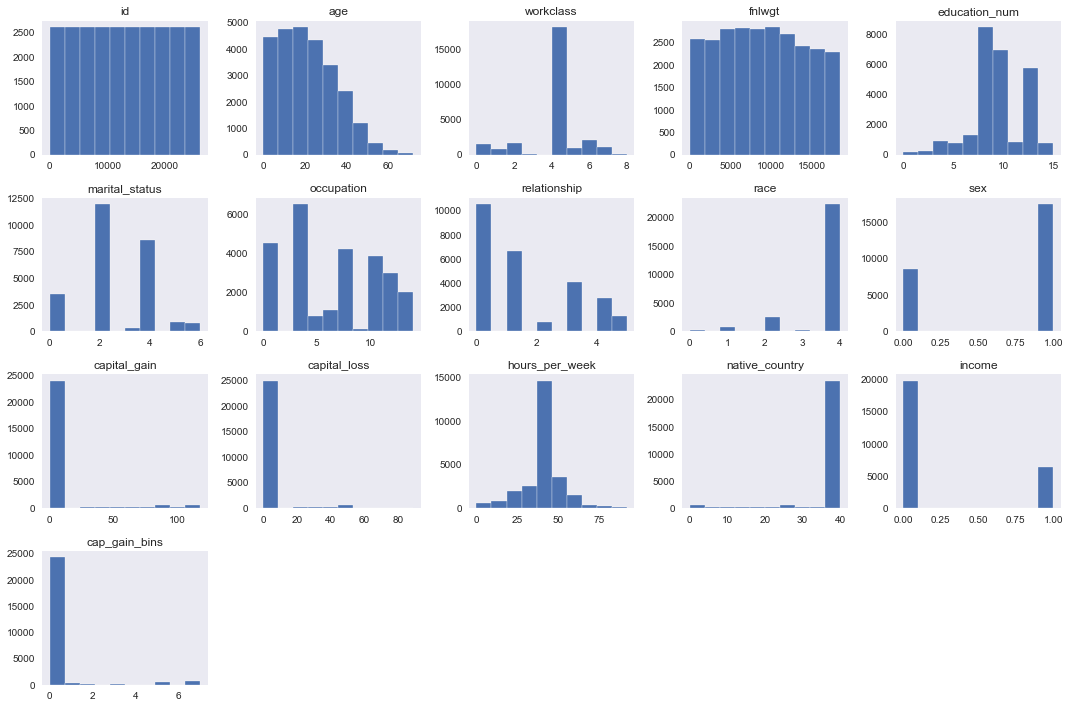

Column [id] is "int64"
	encoding [id]....
Column [age] is "int64"
	encoding [age]....
Column [workclass] is "object"
	encoding [workclass]....
Column [fnlwgt] is "int64"
	encoding [fnlwgt]....
Column [education_num] is "int64"
	encoding [education_num]....
Column [marital_status] is "object"
	encoding [marital_status]....
Column [occupation] is "object"
	encoding [occupation]....
Column [relationship] is "object"
	encoding [relationship]....
Column [race] is "object"
	encoding [race]....
Column [sex] is "object"
	encoding [sex]....
Column [capital_gain] is "int64"
	encoding [capital_gain]....
Column [capital_loss] is "int64"
	encoding [capital_loss]....
Column [hours_per_week] is "int64"
	encoding [hours_per_week]....
Column [native_country] is "object"
	encoding [native_country]....
Column [cap_gain_bins] is "category"
	encoding [cap_gain_bins]....
[Label encoding done.]

1. Keys
Index(['id', 'age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relati

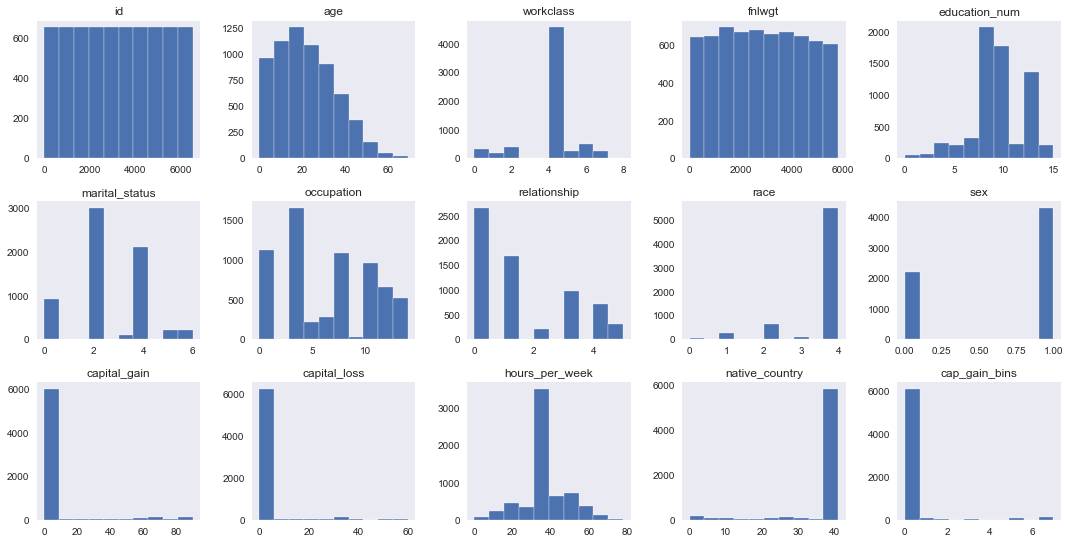

In [39]:
def lable_encode_df(dd):
    le = LabelEncoder()
    for col in dd.columns:
        print(f'Column [{col}] is "{dd[col].dtypes}"')
        if dd[col].dtypes == 'object' or 'category':
            print(f'\tencoding [{col}]....')
            dd[col] = le.fit_transform(dd[col])
    print('[Label encoding done.]')
    print("\n1. Keys")
    print(dd.columns)
    print("\n2. Shape")
    print(dd.shape)
    print("\n3. Head")
    print(dd.head(5))

    return dd

for dd in [train, test]:    
    lable_encode_df(dd)
    plot_histogram(dd)

### Corr 재확인

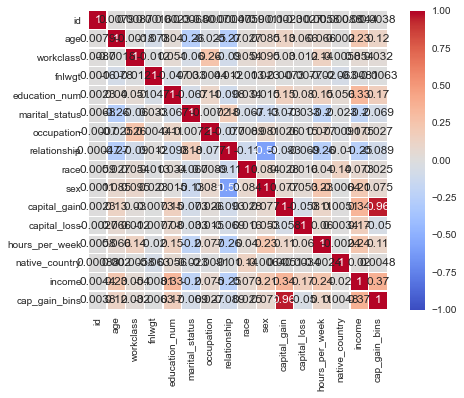

In [40]:
sns.heatmap(train.corr(), annot = True, square = True, linewidth = 0.2, cmap = 'coolwarm', vmax = 1.0, vmin = -1.0)

## 모델링

### train test split

In [41]:
# id Drop
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

In [42]:
X = train.drop('income', axis = 1)
y = train['income']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1105)

In [44]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (20839, 14)
X_test: (5210, 14)
y_train: (20839,)
y_test: (5210,)


### Dummy Clf

In [45]:
from sklearn.dummy import DummyClassifier

import numpy as np



dummy_majority = DummyClassifier(strategy='most_frequent')

dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print('예측된 유니크 레이블 ==> {}'.format(np.unique(pred_most_frequent)))

print("\naccuracy_score: {0:.4f}".format(accuracy_score(y_test, pred_most_frequent)))
print("f1_score: {0:.4f}".format(f1_score(y_test, pred_most_frequent)))
print("precision_score: {0:.4f}".format(precision_score(y_test, pred_most_frequent)))
# print("AUC: Area Under Curve: {0:.4f}".format(roc_auc_score(y_test, pred_most_frequent[:, 1])))

print("\nClassificcation Report: \n{}".format(classification_report(y_test, pred_most_frequent)))
# print("Confusition matrix: \n{}".format(confusion_matrix(y_test, pred_most_frequent)))

예측된 유니크 레이블 ==> [0]

accuracy_score: 0.7597
f1_score: 0.0000
precision_score: 0.0000

Classificcation Report: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3958
           1       0.00      0.00      0.00      1252

    accuracy                           0.76      5210
   macro avg       0.38      0.50      0.43      5210
weighted avg       0.58      0.76      0.66      5210



C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LGBM Clf

In [54]:
remove_features = ['id','income']
features_columns = [col for col in list(train) if col not in remove_features]
target = 'income'

X,y = train[features_columns], train[target]    
P = test[features_columns] 

predictions = np.zeros(len(test))

In [55]:
def lgb_f1_score(y_hat,data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) 
    return 'f1', f1_score(y_true, y_hat,average='macro'), True

In [77]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold , cross_val_score , KFold

def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

# VARS
SEED = 2020
seed_everything(SEED)
target = 'income'   

###### Model params
lgb_params = {
                    'objective':'binary',
                    'boosting_type':'gbdt',
                    'metric':'auc',
                    'n_jobs':-1,
                    'learning_rate':0.005,
                    'num_leaves': 2**7,
                    'max_depth':-1,
                    'tree_learner':'serial',
                    'colsample_bytree': 0.8,
                    'subsample_freq':1,
                    'subsample':0.8,
                    'n_estimators':100000,
                    'max_bin':127,
                    'verbose':-1,
                    'seed': SEED,
                    'early_stopping_rounds':100, 
                } 

folds = KFold(n_splits=5, shuffle=True, random_state=SEED)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    print('Fold:',fold_)
    tr_x, tr_y = X.iloc[trn_idx,:], y[trn_idx]
    vl_x, vl_y = X.iloc[val_idx,:], y[val_idx]

    print(len(tr_x),len(vl_x))
    tr_data = lgb.Dataset(tr_x, label=tr_y)
    vl_data = lgb.Dataset(vl_x, label=vl_y)  

    estimator = lgb.train(
        lgb_params,
        tr_data,
        feval= lgb_f1_score, 
        valid_sets = [tr_data, vl_data],
        verbose_eval = 100
    )   

    pp_p = estimator.predict(P)
    predictions += pp_p/5
    

Fold: 0
20839 5210
Training until validation scores don't improve for 100 rounds


C:\Users\justi\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\justi\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	training's auc: 0.937789	training's f1: 0.633865	valid_1's auc: 0.921607	valid_1's f1: 0.650263
[200]	training's auc: 0.942196	training's f1: 0.779403	valid_1's auc: 0.923057	valid_1's f1: 0.776894
[300]	training's auc: 0.946108	training's f1: 0.817938	valid_1's auc: 0.924004	valid_1's f1: 0.798819
[400]	training's auc: 0.950019	training's f1: 0.834632	valid_1's auc: 0.924638	valid_1's f1: 0.810062
[500]	training's auc: 0.953814	training's f1: 0.844216	valid_1's auc: 0.925289	valid_1's f1: 0.813638
Early stopping, best iteration is:
[451]	training's auc: 0.951986	training's f1: 0.840911	valid_1's auc: 0.924925	valid_1's f1: 0.814933
Fold: 1
20839 5210
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.938746	training's f1: 0.637963	valid_1's auc: 0.917087	valid_1's f1: 0.63695
[200]	training's auc: 0.943037	training's f1: 0.780863	valid_1's auc: 0.918608	valid_1's f1: 0.749456
[300]	training's auc: 0.947146	training's f1: 0.818891	valid_1's auc:

In [84]:
print(f'f1: {f1_score(vl_y, predictions.round(0))}')

ValueError: Found input variables with inconsistent numbers of samples: [5209, 6512]

In [75]:
test_origin

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,prediction
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,0.014
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,0.483
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,0.010
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,0.551
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France,0.756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,0.524
6508,6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,0.623
6509,6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico,0.054
6510,6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0.148


In [76]:
test_origin[['id','prediction']]

,id,prediction
0,0,0.014
1,1,0.483
2,2,0.010
3,3,0.551
4,4,0.756
...,...,...
6507,6507,0.524
6508,6508,0.623
6509,6509,0.054
6510,6510,0.148


In [64]:
submission = tmp['id','prediction']
submission['prediction'] = submission['prediction'].round(0)
submission['prediction'] = submission['prediction'].astype(int)

<ipython-input-64-501cc4b69534>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  submission = tmp[['id','prediction']]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## 결과

In [ ]:
# submission_pred = lgbm.predict(test)
# len(submission_pred)

In [ ]:
break

## 후처리 및 제출

In [ ]:
# submission['prediction'] = submission_pred
# print(submission)
# test[test['capital_gain'] > 5000]

# test[test['capital_gain'] > 5000]

# submission_after = pd.merge(test_origin.copy(), submission, on = 'id')

# print(submission_after)

# submission_after[submission_after['capital_gain'] > 5000]

# def func2(aa, bb):
#     if bb >= 5000:
#         return 1
#     else:
#         return aa

# submission_after['new'] = submission_after.apply(lambda x: func2(x['prediction'], x['capital_gain']), axis =1)

# submission_after['new'].value_counts()

# submission = submission_after[['id', 'prediction']]

# submission.head(3)

In [ ]:
submission.to_csv('submission.scv', index = False)

In [48]:
print(os.getcwd())
os.listdir(os.getcwd())

C:\Users\justi\OneDrive\Git\Kaggle\kakr 4th


['.ipynb_checkpoints',
 '4th KaKr notebook lgb baseline 1.ipynb',
 '4th KaKr notebook.ipynb',
 'AutoML pyCaret.ipynb',
 'catboost_info',
 'kakr-4th-competition.zip',
 'logs.log',
 'powerbi2.pbix',
 'powerbi_vis.pbix',
 'sample_submission.csv',
 'submission.scv',
 'test.csv',
 'train.csv',
 '비율 (1).ipynb',
 '영민님 1030.ipynb',
 '인구소득 예측 컴피티션 집단분석.ipynb',
 '인규 1030 후처리.ipynb']

In [49]:
submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
6507,6507,0
6508,6508,0
6509,6509,0
6510,6510,0


In [50]:
history = pd.DataFrame({})